In [13]:
k=1.102234871 #/eV
V0=10 #eV
a=0.2 #nm
import numpy as np
import matplotlib.pyplot as plt

$2 m/\bar{h}^2 \times a^2=1.102234871 /eV$

In [36]:
def f_even(E):
    return np.sqrt(E)*np.sin(np.sqrt(k*E))-np.sqrt(V0-E)*np.cos(np.sqrt(a*E))
def f_odd(E):
    return np.sqrt(E)*np.sin(np.sqrt(k*E))+np.sqrt(V0-E)*np.cos(np.sqrt(a*E))

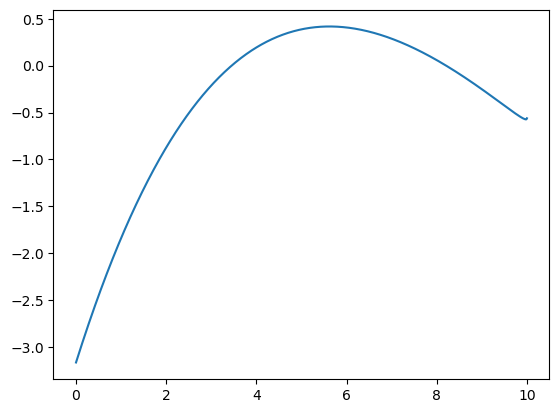

In [37]:
E=np.linspace(0,V0,1000)
plt.plot(E,f_even(E))

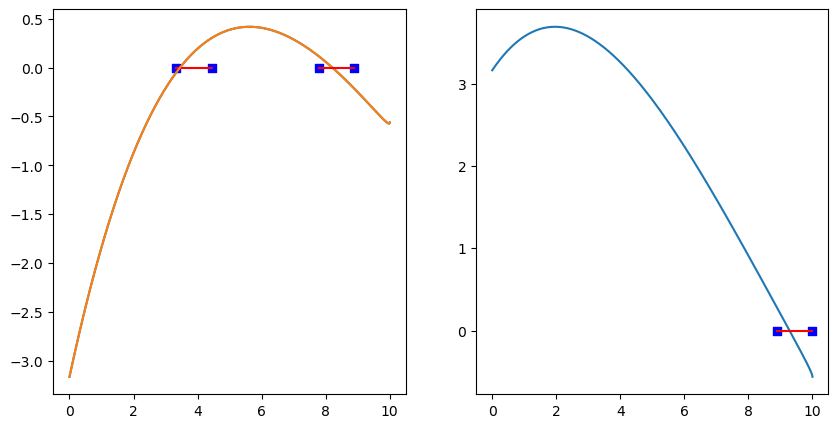

In [38]:
def find_bracket(f,rg=[-3,3],n=10,ifplot=False):
    """
    find the bracket of the root of the function f in the range rg by sampling n points
    :param f: function
    :param rg: range
    :param n: number of points
    :return: the bracket of the root
    """
    x=np.linspace(rg[0],rg[1],n)
    y=f(x)
    y_roll=np.roll(y,1)
    y_cov=y[1:]*y_roll[1:]
    cr0=np.where(y_cov<0)
    bracket=[(x[i],x[i+1]) for i in cr0[0]]
    if ifplot:
        for i in range(len(bracket)):
            xx=np.linspace(rg[0],rg[1],1000)
            plt.plot(xx,f(xx))
            plt.plot(bracket[i],[0,0],c='r')
            plt.scatter(bracket[i],[0,0],c='b',marker="s")
    return bracket
plt.figure(figsize=(10,5))
plt.subplot(121)
bracket_even=find_bracket(f_even,[0,10],n=10,ifplot=True)
plt.subplot(122)
bracket_odd=find_bracket(f_odd,[0,10],n=10,ifplot=True)

In [41]:
def bisection_method(f, rg, tol=1e-4, max_iter=100,ifplot=False):
    a,b=rg
    if f(a) * f(b) >= 0:
        raise ValueError("Function does not change sign in the interval.")
    converged=0
    flist=[]
    for i in range(max_iter):
        c = (a + b) / 2
        if np.abs(b - a) < tol:
            print(f"The bisection method converged after {i} iterations")
            print(f"The root is {c}",f"The error is {np.abs(b - a)}")
            break
        elif f(c) * f(a) < 0:
            b = c
        else:
            a = c
        flist.append(f(c))
    else:
        converged=1
    if converged:
        print("The bisection method did not converge after", max_iter, "iterations.")
    flist=np.array(flist)
    return (a + b) / 2,np.abs(b - a),flist
bisection_method(f_even,bracket_even[0],ifplot=True);
bisection_method(f_even,bracket_even[1],ifplot=True);
bisection_method(f_odd,bracket_odd[0],ifplot=True);

The bisection method converged after 14 iterations
The root is 3.4513007269965277 The error is 6.781684027812318e-05
The bisection method converged after 14 iterations
The root is 8.20736355251736 The error is 6.781684027679091e-05
The bisection method converged after 14 iterations
The root is 9.28436279296875 The error is 6.781684027856727e-05
